In [2]:
import numpy as np
import matplotlib.pylab as plt
from scipy.integrate import odeint

In [3]:
def f(a):
    n=4
    return (1/(1+a**n))
def Gly(y, t, params): 
    J0, k1,k2,k_g1,k_g2,k_p1,k_p2,k4,k5,k6,k7,k8,k9,kappa,phi,A,N= params 
    S1,S2,S3,S4,S5,S6,S6_ex,A3,N2= y 
    dydt= np.empty(len(y)) 
    v1= k1*S1*A3*f(A3)
    v2= k2*S2
    v3= (k_g1*k_p1*S3*(N-N2)*(A-A3)-k_g2*k_p2*S4*A3*N2)/(k_g2*N2+k_p1*(A-A3))
    v4= k4*S4*(A-A3)
    v5= k5*S5
    v6= k6*S6*N2
    v7= k7*A3
    v8= k8*S3*N2
    v9= k9*S6_ex
    dydt[0]= J0-v1
    dydt[1]= v1-v2
    dydt[2]= 2*v2-v3-v8
    dydt[3]= v3-v4
    dydt[4]= v4-v5
    dydt[5]= v5-v6-kappa*(S6-S6_ex)
    dydt[6]= phi*kappa*(S6-S6_ex)-v9
    dydt[7]= -2*v1+v3+v4-v7
    dydt[8]= v3 -v6 -v8
    return dydt 
def solveGly(S1,S2,S3,S4,S5,S6,S6_ex,A3,N2,k9,t2): #t2< 3.2
    t1= np.linspace(0,t2,200) #cannot run any longer. otherwise the program will collapse

    yi= np.array([S1,S2,S3,S4,S5,S6,S6_ex,A3,N2]) 

    params= np.array([50,550,9.8,323.8,57823.1,76411.1,23.7,80,9.7,2000,28,85.7,k9,375,0.1,4,1]) 

    y1= odeint(Gly, yi, t1, args= (params,))
    return y1

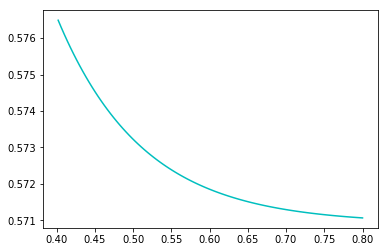

In [20]:
x=np.linspace(0,0.8,200)
plt.figure()
plt.plot(x[100:],solveGly(2,2,6,1,9,1,1,1,0.3,0.5,10)[:,6][100:],'c')
plt.show()

In [20]:
maxsteady=[]
minsteady=[]
for k9 in np.linspace(1,10,100):
    maxsteady+=[np.max(solveGly(2,2,6,1,9,1,1,1,1,k9,3.2)[:,8][60:])]
    minsteady+=[np.min(solveGly(2,2,6,1,9,1,1,1,1,k9,3.2)[:,8][60:])]

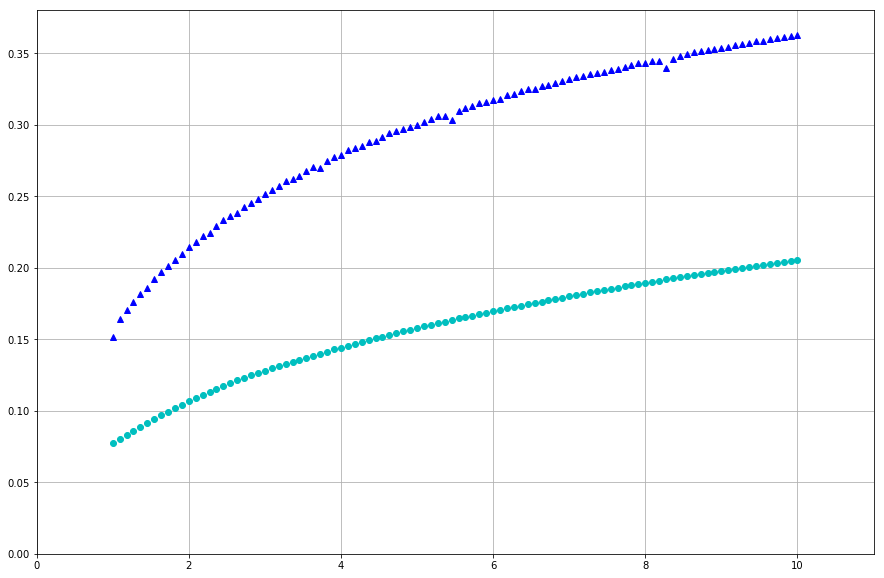

In [21]:
k9 = np.linspace(1,10,100)
plt.figure(figsize=(15,10))
plt.plot(k9,minsteady,'co')
plt.plot(k9,maxsteady,'b^')
plt.xlim(0,11)
plt.ylim(0,0.38)
plt.grid(True)
plt.show()

def f(a):
    n=4
    return (1/(1+a**n))
def Gly2(y, t, params): 
    J0, k1,k2,k_g1,k_g2,k_p1,k_p2,k4,k5,k6,k7,k8,k9,kappa,phi,A,N= params 
    S1,S2,S3,S4,S5,S6,S6_ex,A3,N2= y 
    v1= k1*S1*A3*f(A3)
    v2= k2*S2
    v3= (k_g1*k_g2*S3*(N-N2)*(A-A3)-k_g2*k_p2*S4*A3*N2)/(k_g2*N2+k_p1*(A-A3))
    v4= k4*S4*(A-A3)
    v5= k5*S5
    v6= k6*S6*N2
    v7= k7*A3
    v8= k8*S3*N2
    v9= k9*S6_ex
    dydt= np.empty(len(y)) 
    dydt[0]= J0-k1*S1*A3*f(A3)
    dydt[1]= k1*S1*A3*f(A3)-k2*S2
    dydt[2]= 2*k2*S2-(k_g1*k_p1*S3*(N-N2)*(A-A3)-k_g2*k_p2*S4*A3*N2)/(k_g2*N2+k_p1*(A-A3))-k8*S3*N2
    dydt[3]=(k_g1*k_g2*S3*(N-N2)*(A-A3)-k_g2*k_p1*S4*A3*N2)/(k_g2*N2+k_p1*(A-A3))-k4*S4*(A-A3)
    dydt[4]= k4*S4*(A-A3)-k5*S5
    dydt[5]= k5*S5-k6*S6*N2-kappa*(S6-S6_ex)
    dydt[6]= phi*kappa*(S6-S6_ex)-k9*S6_ex
    dydt[7]= -2*k1*S1*A3*f(A3)+(k_g1*k_p1*S3*(N-N2)*(A-A3)-k_g2*k_p2*S4*A3*N2)/(k_g2*N2+k_p1*(A-A3))+k4*S4*(A-A3)-k7*A3
    dydt[8]=(k_g1*k_p1*S3*(N-N2)*(A-A3)-k_g2*k_p2*S4*A3*N2)/(k_g2*N2+k_p1*(A-A3)) -k6*S6*N2 -k8*S3*N2
    return dydt 
def solveGly2(S1,S2,S3,S4,S5,S6,S6_ex,A3,N2,k9):
    t1= np.linspace(0, 200,200) 

    yi= np.array([S1,S2,S3,S4,S5,S6,S6_ex,A3,N2]) 

    params= np.array([50,550,9.8,323.8,57823.1,76411.1,23.7,80,9.7,2000,28,85.7,k9,375,0.1,4,1]) 

    y1= odeint(Gly, yi, t1, args= (params,))
    return y1

In [26]:
steady=[]
for k9 in np.linspace(0,2.6,100):
    if k9==0:
        init=[3.89922561,5.10310939,0.36791584,2.43573016,10.19743154,1.36993738,1.36675545,3.49239873,0,k9,3.2]
    else:
        init=[inter[0],inter[1],inter[2],inter[3],inter[4],inter[5],inter[6],inter[7],inter[8],k9,3.2]
    steady+=[solveGly(init[0],init[1],init[2],init[3],init[4],init[5],init[6],init[7],init[8],init[9],init[10])[:,8][-1]]
    inter=solveGly(init[0],init[1],init[2],init[3],init[4],init[5],init[6],init[7],init[8],init[9],init[10])[-1]

In [27]:
appro=[] #approximation of the unstable steady state
for k9 in np.linspace(0,10,100):
    appro+=[0.1160*k9**0.380]

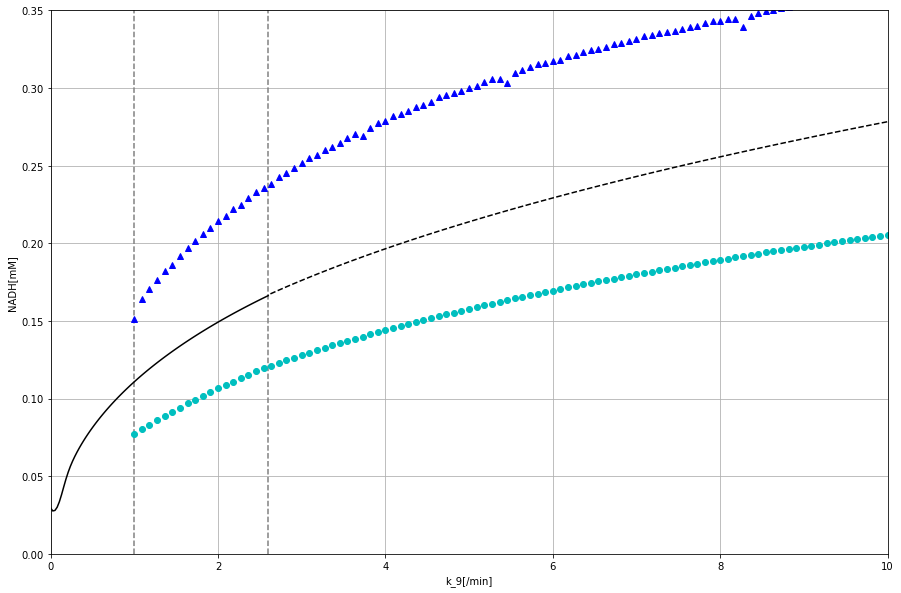

In [28]:
k9 = np.linspace(0,2.6,100)
k9_0 = np.linspace(1,10,100)
k9_2=np.linspace(0,10,100)
plt.figure(figsize=(15,10))
plt.plot(k9,steady,'k-')
plt.plot(k9_2[26:],appro[26:],'k--')
plt.plot(k9_0,minsteady,'co')
plt.vlines(1,0,0.38,colors='grey',linestyles='--')
plt.vlines(2.6,0,0.38,colors='grey',linestyles='--')
plt.plot(k9_0,maxsteady,'b^')
plt.xlim(0,10)
plt.ylim(0,0.35)
plt.grid(True)
plt.xlabel('k_9[/min]')
plt.ylabel('NADH[mM]')
plt.show()

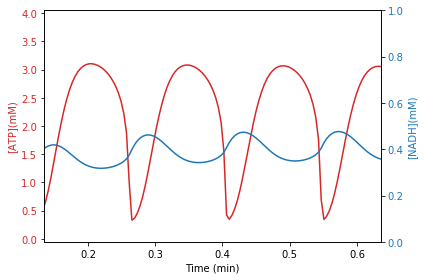

In [29]:
t = np.linspace(0, 0.8, 200)
data1 = solveGly(2,2,6,1,9,1,1,1,0.3,80,0.8)[:,7]
data2 = solveGly(2,2,6,1,9,1,1,1,0.3,80,0.8)[:,8]
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Time (min)')
ax1.set_ylabel('[ATP](mM)', color=color)
ax1.plot(t, data1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('[NADH](mM)', color=color)  # we already handled the x-label with ax1
ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.ylim(0,1)
plt.xlim(0.135,0.635)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()